# FFT: Effect of time domain positioning (1)

Two representations of a normal distribution are FFT transformed. The maximum value is exactly obtained within the time domain sampling for both representations. One representation has the maximum at the border or very first index, *m=0*, the other at the center *m=n/2*.

## Import stuff

In [1]:
import numpy as np
from scipy import fftpack as fft
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import functions for making normal distributions
import sys
sys.path.append('../packages/')
from normal_distribution import *

## Define, calculate and plot normal distribution samples with maxima at center/border and their FFTs

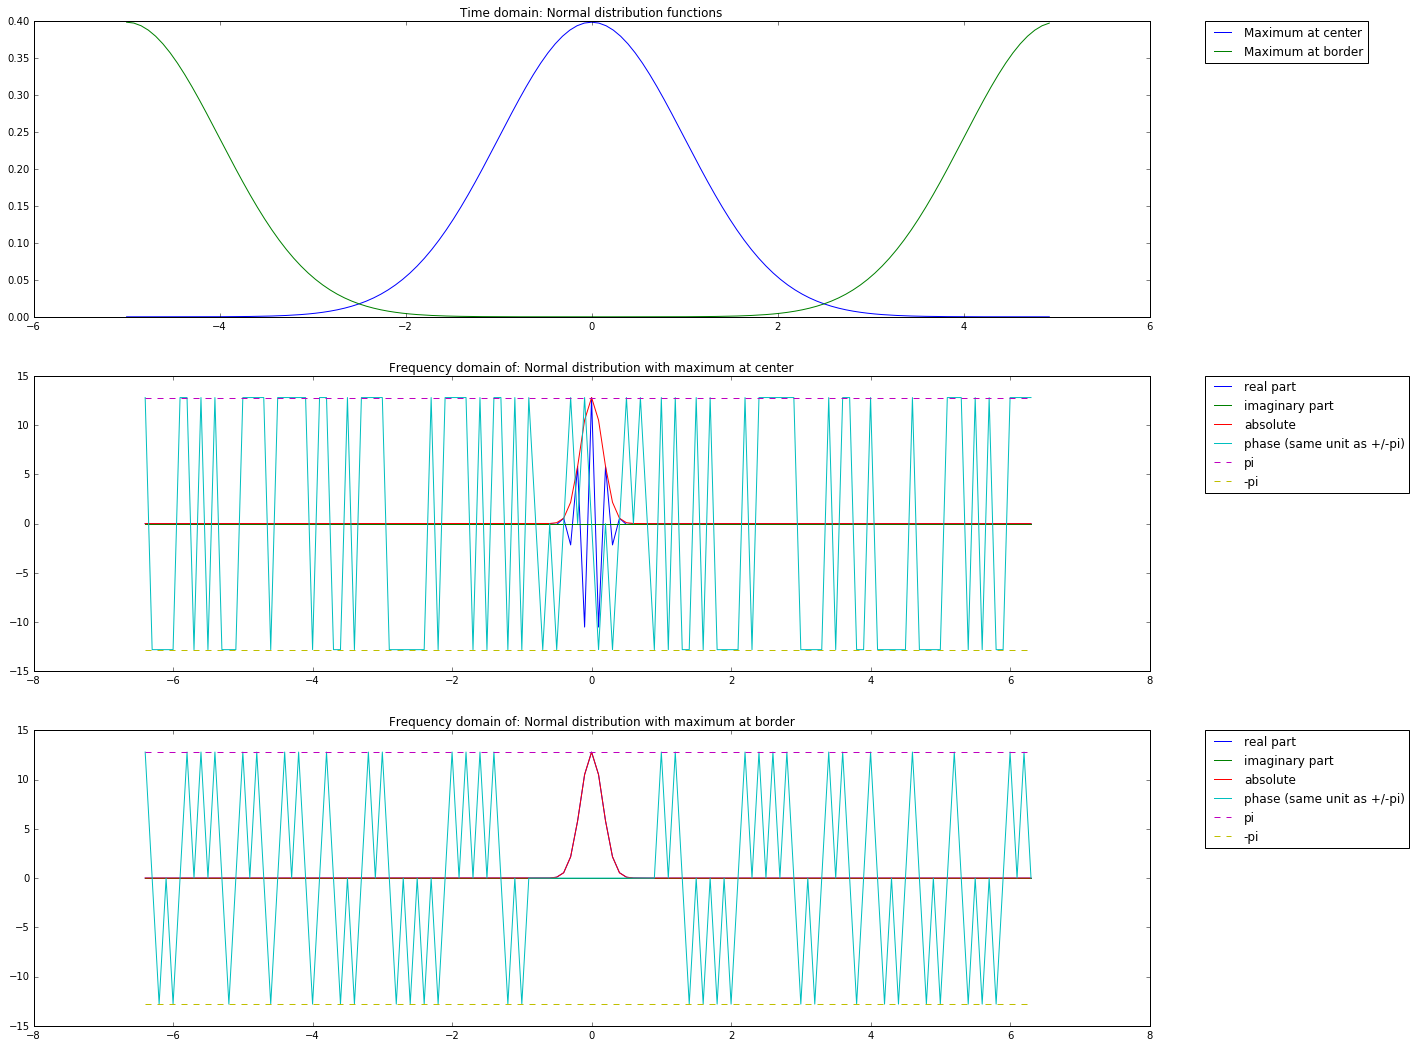

In [8]:
# Define normal distribution density function
sigma     = 1.
mu        = 0.
fct_g     = make_normal_distribution_density(sigma, mu)

# Define time domain
tres      = 128
tmin      = -5.*sigma
tmax      = -tmin * (tres-2) / tres
t         = np.linspace(tmin, tmax, tres)

# Calculate time domain sampling values
g_center  = fct_g(t)
g_border  = np.zeros(shape=g_center.shape)
g_border[0:tres//2]    = g_center[tres//2:tres]
g_border[tres//2:tres] = g_center[0:tres//2]

# Calculate frequency domain representations (frequency spectrum)
G_border  = fft.fft(     g_border)
G_border  = fft.fftshift(G_border)
G_center  = fft.fft(     g_center)
G_center  = fft.fftshift(G_center)
f         = fft.fftfreq(tres, t[1]-t[0])
f         = fft.fftshift(f)

# Get handy representation of frequency spectrum of "centered" normal distribution
G_center_real = np.real( G_center)
G_center_imag = np.imag( G_center)
G_center_abs  = np.abs(  G_center)
G_center_phs  = np.angle(G_center) / np.pi        * np.max(G_center_abs)
G_center_pi   = np.ones(shape=G_center_abs.shape) * np.max(G_center_abs)

# Get handy representation of frequency spectrum of "bordered" normal distribution
G_border_real = np.real( G_border)
G_border_imag = np.imag( G_border)
G_border_abs  = np.abs(  G_border)
G_border_phs  = np.angle(G_border) / np.pi        * np.max(G_border_abs)
G_border_pi   = np.ones(shape=G_border_abs.shape) * np.max(G_border_abs)



# Plot
fig = plt.figure(figsize=(20,18))

sub1 = fig.add_subplot(3, 1, 1)
sub1.set_title('Time domain: Normal distribution functions')
sub1.plot(t, g_center, '-', label='Maximum at center')
sub1.plot(t, g_border, '-', label='Maximum at border')
sub1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sub2 = fig.add_subplot(3, 1, 2)
sub2.set_title('Frequency domain of: Normal distribution with maximum at center')
sub2.plot(f, G_center_real, '-',  label='real part')
sub2.plot(f, G_center_imag, '-',  label='imaginary part')
sub2.plot(f, G_center_abs,  '-',  label='absolute')
sub2.plot(f, G_center_phs,  '-',  label='phase (same unit as +/-pi)')
sub2.plot(f, G_center_pi,   '--', label='pi')
sub2.plot(f, -G_center_pi,  '--', label='-pi')
sub2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

sub3 = fig.add_subplot(3, 1, 3)
sub3.set_title('Frequency domain of: Normal distribution with maximum at border')
sub3.plot(f, G_border_real, '-',  label='real part')
sub3.plot(f, G_border_imag, '-',  label='imaginary part')
sub3.plot(f, G_border_abs,  '-',  label='absolute')
sub3.plot(f, G_border_phs,  '-',  label='phase (same unit as +/-pi)')
sub3.plot(f, G_border_pi,   '--', label='pi')
sub3.plot(f, -G_border_pi,  '--', label='-pi')
sub3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
